In [7]:
import matplotlib.pyplot as plt
import pandas as pd

plt.rc("font", family="Malgun Gothic")
plt.rc('axes', unicode_minus=False)
plt.rcParams['grid.color'] = (0.5, 0.5, 0.5, 0.1)
df = pd.read_csv("../.out/cycles.csv")
df["rolling(outperform)"] = df["outperform"].rolling(10).mean()
df

,date,수익률,평가액,벤치마크 수익률,outperform,rolling(outperform)
0,2001-05-31,0.098844,1.098844e+00,0.116675,-0.017831,NaN
1,2001-06-29,-0.034626,1.060795e+00,0.000373,-0.034999,NaN
2,2001-07-31,0.154941,1.225157e+00,-0.108863,0.263804,NaN
3,2001-08-31,-0.013697,1.208376e+00,-0.050080,0.036383,NaN
4,2001-09-28,-0.140885,1.038134e+00,-0.131838,-0.009047,NaN
...,...,...,...,...,...,...
259,2022-06-30,-0.107146,3.491098e+06,-0.164546,0.057400,0.041552
260,2022-07-29,0.048802,3.661471e+06,0.070095,-0.021292,0.037321
261,2022-08-31,0.037469,3.798664e+06,0.009948,0.027521,0.031119
262,2022-09-30,-0.154892,3.210282e+06,-0.157408,0.002516,0.028266


0.06592976915153867 0.014348067271419187


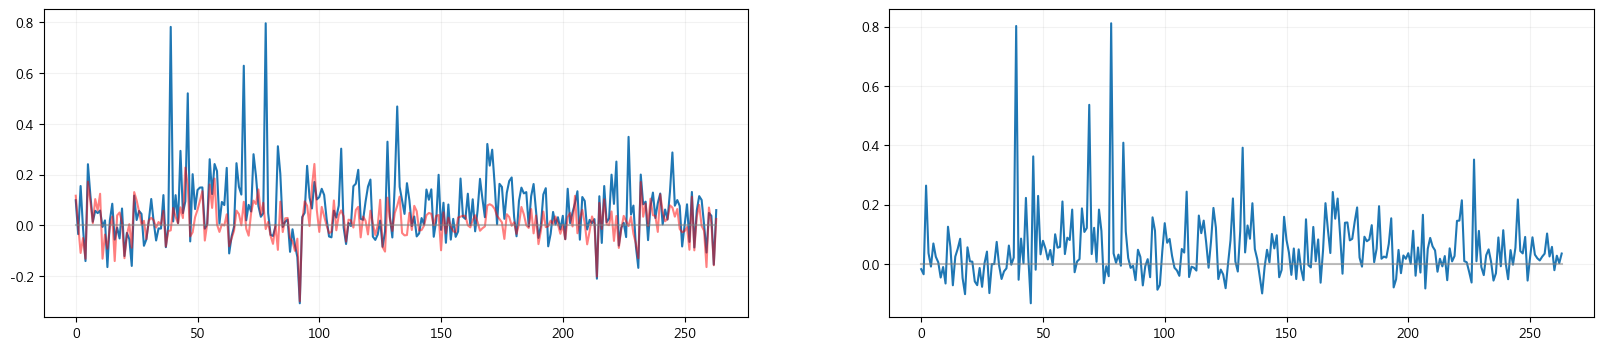

In [5]:
print(df["수익률"].mean(), df['벤치마크 수익률'].mean())
plt.figure(figsize=(20, 4))
plt.subplot(1, 2, 1)
plt.grid(True)
plt.plot(df["수익률"])
plt.plot(df["벤치마크 수익률"], color="red", alpha=0.5)
plt.plot(df["수익률"] * 0, color="grey", alpha=0.5)

plt.subplot(1, 2, 2)
plt.grid(True)
plt.plot(df["outperform"])
plt.plot(df["수익률"] * 0, color="grey", alpha=0.5)
plt.show()